In [1]:
from fastai.vision.all import *

bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

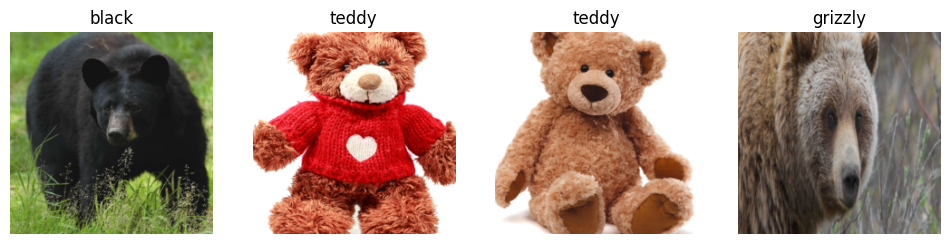

In [8]:
path = Path("C:\\Users\\MONSTER\\Desktop\\archive\\bears")
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [10]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.408050,0.421082,0.192982,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.331987,0.088005,0.017544,00:29
1,0.230839,0.009553,0.000000,00:31
2,0.162455,0.003839,0.000000,00:27
3,0.127442,0.003786,0.000000,00:31


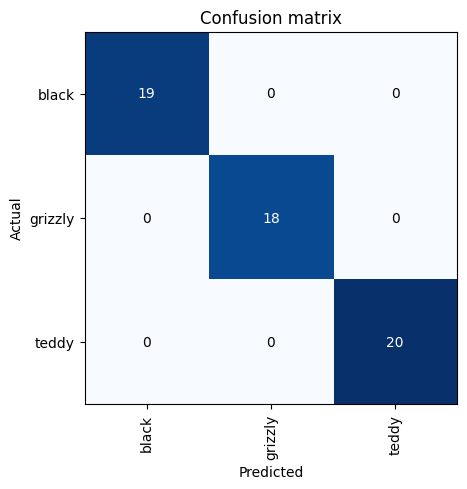

In [4]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [5]:
learn.export()

In [12]:
learn_inf = load_learner("C:\\Users\\MONSTER\\Desktop\\export.pkl")
learn_inf.predict("C:\\Users\\MONSTER\\Desktop\\b_bear.jpeg")

('black', tensor(0), tensor([9.9990e-01, 1.0041e-04, 9.0977e-07]))